Klik hierboven op *Cell*, en dan *Run all* om deze notebook uit te voeren.

In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Toon Python code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Verberg Python code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Toon Python code"></form>''')

In [9]:
# General Purpose
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

# Jupyter Specifics
from IPython.display import HTML
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

%matplotlib inline

style = {'description_width': '150px'}
slider_layout = Layout(width='50%')

# OEF 3

De plasmaconcentratie-tijdscurve van een geneesmiddel dat IV wordt toegediend, in een dosis van
300 mg, kan door de volgende vergelijking beschreven worden:
$C_p = 78 e^{-0.46 t}$ (met $C_p$ in mg/mL en $t$ in u)
<ul>
<li>Bepaal de halfwaardetijd, verdelingsvolume, klaring.</li>
<li>Wat is de concentratie 4 u na toediening?</li>
<li>Hoeveel geneesmiddel blijft over in het organisme 4 u na toediening?</li>
</ul>

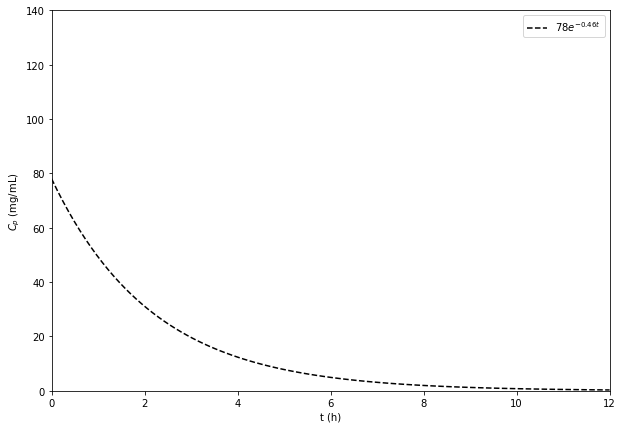

In [10]:
xmax=12
ymax=140

t = np.linspace(0,xmax,100)


def cp(t):
    return 78*np.exp(-0.46*t)
    
    
plt.figure(figsize=(10,7))
    
plt.subplot(111)
plt.plot(t,cp(t), 'k--',label='$78 e^{-0.46t}$')
plt.xlim(0,xmax)
plt.ylim(0,ymax)
plt.legend()
plt.xlabel('t (h)')
plt.ylabel('$C_p$ (mg/mL)')
plt.show()

Meer algemeen wordt de plasmaconcentratie-tijdscurve van een geneesmiddel dat IV wordt toegediend gegeven door

$C_p = \dfrac{D}{V_d}e^{-k_e t} $, 

met $C_p$ de plasmaconcentratie, $D$ de toegediende dosis, $V_d$ het distributievolume en $k_e$ de eliminatiesnelheidsconstante. In onderstaande animatie kan men nagaan hoe een verandering in deze parameters de plasmaconcentratie-tijdscurve beïnvloedt.

In [11]:
xmax3=12
ymax3=140

t3 = np.linspace(0,xmax3,100)

def cp(t):
    return 78*np.exp(-0.46*t)



def oef3(D,Vd,ke):


    
    
    def cpvrij(t):
        return D/Vd*np.exp(-ke*t)
    
    plt.figure(figsize=(10,7))
    
    plt.subplot(111)
    plt.plot(t3,cp(t3), 'k--',label='$78 e^{-0.46t}$')
    plt.plot(t3,cpvrij(t3), 'r',label='$\dfrac{D}{V_d} e^{-k_et}$')
    plt.text(0.1,D/Vd+0.1,'$C_p(0)=\dfrac{D}{V_d}$', color='red',fontsize=12)
    plt.plot([0,0.693/ke], [D/Vd/2,D/Vd/2], 'r--')
    plt.plot([0.693/ke,0.693/ke], [D/Vd/2,0], 'r--')    
    plt.text(0.1,D/Vd/2+3.5,'$\dfrac{[C](0)}{2}$', color='red', fontsize=12)
    plt.text(0.693/ke+0.1,2,'$t_{1/2}$', color='red', fontsize=12)
    plt.xlim(0,xmax3)
    plt.ylim(0,ymax3)
    plt.legend()
    plt.xlabel('t (h)')
    plt.ylabel('$C_p$ (mg/mL)')
    plt.show()

interact(oef3, ke=FloatSlider(min=0.2, max=0.6, step=0.04, value=0.46, description='$k_e$', style=style, layout=slider_layout)
        , D=FloatSlider(min=100, max=450, step=50, value=300, description='$D$', style=style, layout=slider_layout)
        , Vd=FloatSlider(min=3, max=5,step=0.2, value=3.8, description='$V_d$', style=style, layout=slider_layout));

interactive(children=(FloatSlider(value=300.0, description='$D$', layout=Layout(width='50%'), max=450.0, min=1…

# OEF 6

Een éénmalige IV dosis (6 mg/kg) van een antibioticum wordt toegediend aan een vrouw (50 kg).
Bloedstalen worden afgenomen in functie van de tijd. De concentraties in het plasma in functie van de
tijd worden links in onderstaande figuur afgebeeld, samen met het wiskundig model

$C_p = \dfrac{D}{V_d}e^{-\dfrac{Cl}{V_d} t} $, 

met $C_p$ de plasmaconcentratie, $D$ de toegediende dosis, $V_d$ het distributievolume en $Cl$ de klaring. De rechtse figuur stelt dezelfde data en hetzelfde model voor, maar nu op een semi-logaritmische schaal.



<ul>
<li>Schat aan de hand van onderstaande animatie de waarden van $V_d$, $Cl$ en $t_{1/2}$.</li>
<li>Dit antibioticum is niet effectief bij een concentratie $C_p < 2$ mg/ml. Wat is de duur van het effect?</li>
<li>Hoelang zal het duren om $98.4\%$ van de dosis te elimineren?</li>
<li>Wat is de duur van het effect als de dosis wordt verdubbeld?</li>
</ul>


In [12]:
x6 = [0.25,0.5,1,3,6,12,18]
y6 = [8.21,7.87,7.23,5.15,3.09,1.11,0.4]
logy6 = [0.914343157,0.895974732,0.859138297,0.711807229,0.489958479,0.045322979,-0.397940009]
xmax6=18
ymax6=10
t6 = np.linspace(0,xmax6,30)

def oef6(Vd,Cl,D):
    

    def cpvrij(t):
        return D/Vd*np.exp(-(Cl/Vd)*t)
    def cplog(t):
        return np.log10(D/Vd)-(Cl/Vd)*t/2.303
    
    (fig, ax) = plt.subplots(1, 2, sharey=False,figsize=(15,7))
    ax[0].plot(t6,cpvrij(t6), 'k',label='$C_p(t)=\dfrac{D}{V_d} e^{-\dfrac{Cl}{V_d}t}$')
    #plt.text(0.1,D/Vd+0.1,'$C_p(0)=\dfrac{D}{V_d}$', color='red',fontsize=12)
    ax[0].plot(x6, y6, 'o', color='g')
    ax[0].plot([0,xmax6], [2,2], 'k--')
    ax[0].text(xmax6-2.5,2+0.2,'$2$ mg/ml', color='black', fontsize=12)
#    ax1.xlim(0,xmax)
#    ax1.ylim(0,ymax)
    ax[0].legend()
#    ax1.xlabel('t (h)')
#    ax1.ylabel('$C_p$ (mg/mL)')
    
    ax[1].plot(t6,cplog(t6), 'k',label='$\log(C_p(t))=\log(\dfrac{D}{V_d})-\dfrac{1}{2.303}\dfrac{Cl}{V_d}t$')
    #plt.text(0.1,D/Vd+0.1,'$C_p(0)=\dfrac{D}{V_d}$', color='red',fontsize=12)
    ax[1].plot(x6, logy6, 'o', color='r')
    ax[1].plot([0,xmax6], [0.30102999566,0.30102999566], 'k--')
    ax[1].text(xmax6-1.9,0.30102999566+0.02,'$\log(2)$', color='black', fontsize=12)
 #   ax2.xlim(0,xmax)
#    ax2.ylim(0,ymax)
    ax[1].legend()
 #   ax2.xlabel('t (h)')
 #   ax2.ylabel('$\log(C_p)$')
    ax[0].set_ylabel('$C_p$ (mg/mL)')
    ax[0].set_xlabel('t (h)')
    ax[1].set_ylabel('$\log(C_p)$')
    ax[1].set_xlabel('t (h)')
    
    ax[0].set_xlim([0,xmax6])
    ax[0].set_ylim([0,ymax6])
    ax[1].set_xlim([0,xmax6])
    ax[1].set_ylim([0,1])
    plt.show()
    
interact(oef6,Cl=FloatSlider(min=1, max=10, step=1, value=5, description='$Cl$', style=style, layout=slider_layout)
        , Vd=FloatSlider(min=5, max=50,step=5, value=20, description='$V_d$', style=style, layout=slider_layout)
        , D=FloatSlider(min=200, max=600,step=100, value=300, description='$D$', style=style, layout=slider_layout));



interactive(children=(FloatSlider(value=20.0, description='$V_d$', layout=Layout(width='50%'), max=50.0, min=5…

# OEF 7

Een anestheticum heeft een distributievolume van 15 L en een minimum effectieve concentratie van
2 μg/mL. Na intraveneuze toediening van 120 mg vertoont het product een anesthetisch effect voor 6 u.

<ul>
<li>Bereken de eliminatiehalfwaardetijd van het geneesmiddel.</li>
<li>Bereken de verwachte duur van het effect als de dosis 240 mg zou zijn.</li>
<li>Bereken de laagste dosis die een effect zou geven voor 3 u.</li>
</ul>

In [13]:
ke7=0.231

xmax7=10
ymax7=18
t7 = np.linspace(0,xmax7,100)

def oef7(Vd,D,mec):
    
    def cpvrij(t):
        return D/Vd*np.exp(-ke7*t)
    
    plt.figure(figsize=(10,7))
    plt.subplot(111)
    plt.plot(t7,cpvrij(t7), 'k',label='$\dfrac{D}{V_d} e^{-k_et}$')
    #plt.text(0.1,D/Vd+0.1,'$C_p(0)=\dfrac{D}{V_d}$', fontsize=12)
    
    
    plt.text(xmax7-3.6,mec+0.1,'minimum effectieve concentratie', fontsize=12)
    plt.plot([0,xmax7], [mec,mec], 'k--')
    plt.xlim(0,xmax7)
    plt.ylim(0,ymax7)
    plt.legend()
    plt.xlabel('t (h)')
    plt.ylabel('$C_p$ (µg/mL)')
    plt.show()
    
interact(oef7,D=FloatSlider(min=100, max=240, step=20, value=120, description='$D$', style=style, layout=slider_layout)
        , Vd=FloatSlider(min=10, max=20,step=2, value=15, description='$V_d$', style=style, layout=slider_layout)
        , mec=FloatSlider(min=1, max=6,step=0.5, value=2, description='minimum effectieve concentratie', style=style, layout=slider_layout));

interactive(children=(FloatSlider(value=15.0, description='$V_d$', layout=Layout(width='50%'), max=20.0, min=1…

# OEF 10

Aan een vrijwilliger dient men peroraal 500 mg geneesmiddel toe. In onderstaande figuur worden de bloedspiegels semilogaritmisch
uitgezet. Bepaal de halfwaardetijd, de eliminatiesnelheidsconstante ($k_e$) en de absorptiesnelheidsconstante ($k_a$).

In [14]:
x10 = [0.25,0.5,1,1.5,2,3,4,6,9,12]
y10 = [9.6,13.8,19.9,20.7,19.8,15.4,13.4,6.5,3.8,1.7]
yln10 = np.log(y10)

xmax10=15
ymax10=5

t10 = np.linspace(0,xmax10,100)


def oef10(fac,ke,ka):
    
    def kar(t):
        return np.log(fac*ka/(ka-ke)) - ka*t
    
    def ker(t):
        return np.log(fac*ka/(ka-ke)) - ke*t
    
    
    plt.figure(figsize=(10,7))
    plt.subplot(111)
    plt.plot(x10, yln10, 'o', color='g',label='meetdata')
    
    plt.plot(t10,ker(t10), 'g',label='$\ln I - k_e t$')
    
    
    
    
    
    
    plt.plot(0, np.log(fac*ka/(ka-ke)), 'o', color='k')
    plt.text(0.2,np.log(fac*ka/(ka-ke))-0.1,'$\ln I= \ln \dfrac{FDk_a}{V_d (k_a-k_e)}$', fontsize=12)
    
    
    
    plt.plot(np.array(x10[0:4]), np.log(np.exp(ker(np.array(x10[0:4])))-y10[0:4]), 'o', color='b',label='$\ln (C_p^{´} - C_p)$')
    plt.plot(t10,kar(t10), 'b',label='$\ln I - k_a t$')
    
    plt.xlim(0,xmax10)
    plt.ylim(0,ymax10)
    plt.xlabel('t')
    plt.ylabel('$\ln (C_p)$')
    plt.legend()
    plt.show()
    
interact(oef10,fac=FloatSlider(min=20, max=40, step=2, value=30, description='$FD/V_d$', style=style, layout=slider_layout)
        , ke=FloatSlider(min=0.2, max=0.3,step=0.01, value=0.2, description='$k_e$', style=style, layout=slider_layout)
        , ka=FloatSlider(min=1, max=4,step=0.1, value=2, description='$k_a$', style=style, layout=slider_layout));

interactive(children=(FloatSlider(value=30.0, description='$FD/V_d$', layout=Layout(width='50%'), max=40.0, mi…

# OEF 12

Meervoudige IV bolusinjecties (250 mg) van een geneesmiddel worden elke 8 uur toegediend. Volgende
PK parameters zijn gegeven: $V_d = 30$ L, $k_e = 0.1 \text{u}^{-1}$.
Bereken:

<ul>
<li>$C_p$ op 3 u na de 2de dosis.</li>
<li>piek en dal concentraties gedurende het 2de dosisinterval.</li>
</ul>


In [15]:
xmax12=40
ymax12=20

def oef12(n,D,Vd,ke,tau):


    res=np.array([])
    tijds=np.array([])

    def cpvrij(t,n):
        return (D/Vd)*(1-np.exp(-n*ke*tau))/(1-np.exp(-ke*tau))*np.exp(-ke*(t-i*tau))


    for i in range(n-1):
        t = np.linspace(i*tau,(i+1)*tau-0.01,40)
        tijds=np.concatenate((tijds,t))
        res=np.concatenate((res,cpvrij(t,i+1)))
    
    i=n-1
    t = np.linspace(i*tau,(n+4)*tau-0.01,100)
    tijds=np.concatenate((tijds,t))
    res=np.concatenate((res,cpvrij(t,i+1)))

    plt.plot(tijds,res, 'k')
    plt.xlim(0,xmax12)
    plt.ylim(0,ymax12)
    plt.xlabel('t (h)')
    plt.ylabel('$C_p$ (mg/L)')
    plt.show()
    
    
interact(oef12,D=FloatSlider(min=50, max=400, step=50, value=250, description='$D$', style=style, layout=slider_layout)
        , Vd=FloatSlider(min=10, max=50,step=10, value=30, description='$V_d$', style=style, layout=slider_layout)
        , n=IntSlider(min=1, max=10,step=1, value=4, description='n', style=style, layout=slider_layout)
        , tau=FloatSlider(min=1, max=10,step=1, value=8, description=r'$\tau$', style=style, layout=slider_layout)
        , ke=FloatSlider(min=0.05, max=1,step=0.05, value=0.1, description='$k_e$', style=style, layout=slider_layout));

interactive(children=(IntSlider(value=4, description='n', layout=Layout(width='50%'), max=10, min=1, style=Sli…

# OEF 13

Een man van 80 kg dient een behandeling te krijgen met een anti-epilepticum via intraveneuze injecties.
Therapeutische range = 10-30 mg/L; $V_d=0.7$ L/kg; $Cl=4$ mL/(u.kg). Stel een doseringsschema
op. Bepaal of er een ladingsdosis nodig is.

In [16]:
Cl13=0.004
Vd13=0.7
m13=80

dmin13=10
dmax13=30

xmax13=500
ymax13=40

def oef13(n,D,tau,ladingsdosis):


    res=np.array([])
    tijds=np.array([])

    def cpvrij(t,n):
        return (D/(Vd13*m13))*(1-np.exp(-n*(Cl13/Vd13)*tau))/(1-np.exp(-(Cl13/Vd13)*tau))*np.exp(-(Cl13/(Vd13)*(t-i*tau)))

    def cpvrijloaded(t,n):
        return (D/(Vd13*m13))/(1-np.exp(-(Cl13/Vd13)*tau))*np.exp(-(Cl13/(Vd13)*(t-i*tau)))
    
    for i in range(n-1):
        t = np.linspace(i*tau,(i+1)*tau-0.01,40)
        tijds=np.concatenate((tijds,t))
        
        if ladingsdosis == False:
            res=np.concatenate((res,cpvrij(t,i+1)))
        else:
            res=np.concatenate((res,cpvrijloaded(t,i+1)))
    
    i=n-1
    t = np.linspace(i*tau,(n+4)*tau-0.01,100)
    tijds=np.concatenate((tijds,t))
    if ladingsdosis == False:
        res=np.concatenate((res,cpvrij(t,i+1)))
    else:
        res=np.concatenate((res,cpvrijloaded(t,i+1)))

    plt.plot(tijds,res, 'k')
    plt.xlim(0,xmax13)
    plt.ylim(0,ymax13)
    plt.xlabel('t (h)')
    plt.ylabel('$C_p$ (mg/L)')
    
    #plt.text(xmax-45,dmin+0.6,'minimum effectieve concentratie', fontsize=12)
    plt.plot([0,xmax13], [dmin13,dmin13], 'k--')
    plt.plot([0,xmax13], [dmax13,dmax13], 'k--')
    
    plt.show()
    
    
interact(oef13, ladingsdosis=False
        , D=FloatSlider(min=100, max=600, step=50, value=300, description='$D$', style=style, layout=slider_layout)
        , n=IntSlider(min=6, max=20,step=2, value=10, description='n', style=style, layout=slider_layout)
        , tau=FloatSlider(min=12, max=120,step=6, value=24, description=r'$\tau$', style=style, layout=slider_layout));

interactive(children=(IntSlider(value=10, description='n', layout=Layout(width='50%'), max=20, min=6, step=2, …

# OEF 14

Een patiënt krijgt om de 12 u een intraveneuze injectie van een antibioticum (dosis: 400 mg) met
een halfwaardetijd van 6 u. Het verdelingsvolume is 20 L. De farmacokinetiek beantwoordt aan een
één-compartimenteel model.

<ul>
<li>Bereken de maximale en minimale hoeveelheden aanwezig in het organisme in functie van de tijd.
Bepaal de gemiddelde steady-state concentratie.</li>
<li>Teken de verwachte hoeveelheden van het geneesmiddel in het lichaam aanwezig in functie van de
tijd. Indien de halfwaardetijd 12 u is, bereken en teken terug de maximale en minimale hoeveelheden
in het lichaam voor eenzelfde doseringsschema. Wat kan je hieruit besluiten?</li>
<li>Bepaal de ladingsdosis.</li>
</ul>

In [17]:
n14=10
tau14=12
xmax14=120
ymax14=80

def oef14(D,t12,Vd,ladingsdosis):

    

    res=np.array([])
    tijds=np.array([])
    
    Cl=0.693*Vd/t12

    def cpvrij(t,n):
        return (D/Vd)*(1-np.exp(-n*(Cl/Vd)*tau14))/(1-np.exp(-(Cl/Vd)*tau14))*np.exp(-(Cl/Vd)*(t-i*tau14))
    
    def cpss(t):
        return (D/Vd)/(1-np.exp(-(Cl/Vd)*tau14))*np.exp(-(Cl/Vd)*(t))

    def cpvrijloaded(t,n):
        return (D/Vd)/(1-np.exp(-(Cl/Vd)*tau14))*np.exp(-(Cl/Vd)*(t-i*tau14))

    for i in range(n14-1):
        t = np.linspace(i*tau14,(i+1)*tau14-0.01,40)
        tijds=np.concatenate((tijds,t))
        if ladingsdosis==False:
            res=np.concatenate((res,cpvrij(t,i+1)))
        else:
            res=np.concatenate((res,cpvrijloaded(t,i+1)))
    
    i=n14-1
    t = np.linspace(i*tau14,(n14+4)*tau14-0.01,100)
    tijds=np.concatenate((tijds,t))
    if ladingsdosis==False:
        res=np.concatenate((res,cpvrij(t,i+1)))
    else:
        res=np.concatenate((res,cpvrijloaded(t,i+1)))

    plt.plot(tijds,res, 'k')
    
#    resss=cpss(tijds)
#    plt.plot(tijds,resss, 'k--')
    
    plt.plot([0,xmax14], [D/Vd*1/(1-np.exp(-(Cl/Vd)*tau14)),D/Vd*1/(1-np.exp(-(Cl/Vd)*tau14))], 'k--')
    plt.text(xmax14-15,D/Vd*1/(1-np.exp(-(Cl/Vd)*tau14))+2,'$C_{\infty,max}$', fontsize=12)
    plt.plot([0,xmax14], [D/Vd*1/(1-np.exp(-(Cl/Vd)*tau14))*np.exp(-(Cl/Vd)*tau14),D/Vd*1/(1-np.exp(-(Cl/Vd)*tau14))*np.exp(-(Cl/Vd)*tau14)], 'k--')
    plt.text(xmax14-15,D/Vd*1/(1-np.exp(-(Cl/Vd)*tau14))*np.exp(-(Cl/Vd)*tau14)-4.5,'$C_{\infty,min}$', fontsize=12)
    
    
    plt.xlim(0,xmax14)
    plt.ylim(0,ymax14)
    plt.xlabel('t (h)')
    plt.ylabel('$C_p$ (mg/L)')
    
    
    plt.show()
    
    
interact(oef14,ladingsdosis=False
        , D=FloatSlider(min=200, max=600, step=50, value=400, description='$D$', style=style, layout=slider_layout)
        , t12=IntSlider(min=3, max=15,step=3, value=6, description='$t_{1/2}$', style=style, layout=slider_layout)
        , Vd=FloatSlider(min=10, max=30,step=2, value=20, description='$V_d$', style=style, layout=slider_layout));

interactive(children=(FloatSlider(value=400.0, description='$D$', layout=Layout(width='50%'), max=600.0, min=2…

# OEF 20

Een antibioticum wordt aan een volwassen patiënt (75 kg, 58 jaar) intraveneus geïnfundeerd. De
halfwaardetijd is 8 u en het verdelingsvolume is 1,5 L/kg. Het geneesmiddel is voorhanden in 30
mL-ampullen met een concentratie van 15 mg/mL. Men wenst een steady-state concentratie voor dit
antibioticum gelijk aan 20 µg/mL te bereiken.

<ul>
<li>Welke infusiesnelheid zou je voorstellen voor deze patiënt?</li>
<li>Welke ladingsdosis zou je toedienen?</li>
<li>Indien de fabrikant van dit product een dosis gelijk aan 0,2 mL/u en per kg lichaamsgewicht voorstelt,
wat zou dan de verwachte steady-state concentratie zijn?</li>
</ul>

In [18]:



xmax20=48
ymax20=0.03

m20=75


def oef20(conc,vol,t12,Vd,snel):
    
    # vol (ml)
    # conc (mg/ml)
    # snel (ml/h)
    # Vd = 1.5 l/kg * 75 kg
    
    inftijd=vol/snel
    uittijd=t12*4
    k0=conc*snel
    
    t1 = np.linspace(0,inftijd-0.01,100)
    t2 = np.linspace(0,uittijd,100)

    def cp1(t):
        return k0/(Vd*m20)/(0.693/t12)*(1-np.exp(-(0.693/t12)*t))

    def cp2(t,init):
        return init*np.exp(-(0.693/t12)*t)
    
    plt.figure(figsize=(10,7))
    plt.subplot(111)
    eerstegolf=cp1(t1)
    tweedegolf=cp2(t2,eerstegolf[len(eerstegolf)-1])
    plt.plot(np.concatenate((t1,t2+inftijd)),np.concatenate((eerstegolf,tweedegolf)), 'k')
    
#    plt.plot([0,xmax], [k0/(0.693/t12)/Vd,k0/(0.693/t12)/Vd], 'k--')
#    plt.text(xmax-5,k0/(0.693/t12)/Vd+0.2,'$C_{ss,gewenst}$', fontsize=12)
    
    plt.plot([0,xmax20], [0.020,0.020], 'k--')
    plt.text(xmax20-5,0.020+0.001,'$C_{ss,gewenst}$', fontsize=12)
    
    
    plt.xlim(0,xmax20)
    plt.ylim(0,ymax20)
    plt.xlabel('t (h)')
    plt.ylabel('$C_p$ (mg/L)')
    plt.show()
    

interact(oef20,t12=FloatSlider(min=2, max=16, step=2, value=8, description='$t_{1/2}$', style=style, layout=slider_layout)
     #   , Vd=FloatSlider(min=0.5, max=4,step=0.5, value=1.5, description='$V_d$', style=style, layout=slider_layout)
        , Vd=FloatSlider(min=500, max=4000,step=500, value=1500, description='$V_d$', style=style, layout=slider_layout)
        , conc=FloatSlider(min=5, max=30,step=5, value=15, description='concentratie ampulle', style=style, layout=slider_layout)
        , vol=FloatSlider(min=10, max=50,step=5, value=30, description='volume ampulle', style=style, layout=slider_layout)
        , snel=FloatSlider(min=5, max=15,step=1, value=10, description='infusiesnelheid', style=style, layout=slider_layout));

interactive(children=(FloatSlider(value=15.0, description='concentratie ampulle', layout=Layout(width='50%'), …

# OEF 21

Onderstaande meetdata werden verkregen bij intraveneuze infusie van een geneesmiddel met een
infuussnelheid van 50 mg/u gedurende 7,5 u.

Bepaal het distributievolume, de eliminatiesnelheidsconstante, de eliminatiehalfwaardetijd en de klaring.

In [19]:
k021=50
inftijd21=7.5
uittijd21=7

x21 = [0,2,4,6,7.5,9,12]
y21 = [0,3.4,5.4,6.5,7,4.6,2]

xmax21=14
ymax21=10


t121 = np.linspace(0,inftijd21-0.01,100)
t221 = np.linspace(0,uittijd21,100)

def oef21(Vd,Cl):
    def cp1(t):
        return k021/Vd/(Cl/Vd)*(1-np.exp(-(Cl/Vd)*t))

    def cp2(t,init):
        return init*np.exp(-(Cl/Vd)*t)
    
    plt.figure(figsize=(10,7))
    plt.subplot(111)
    eerstegolf=cp1(t121)
    tweedegolf=cp2(t221,eerstegolf[len(eerstegolf)-1])
    plt.plot(np.concatenate((t121,t221+inftijd21)),np.concatenate((eerstegolf,tweedegolf)), 'k')
    plt.plot(x21, y21, 'o', color='g')
    plt.xlim(0,xmax21)
    plt.ylim(0,ymax21)
    plt.xlabel('t (h)')
    plt.ylabel('$C_p$ (mg/L)')
    plt.show()
    
interact(oef21,Cl=FloatSlider(min=2, max=8, step=0.5, value=5, description='$Cl$', style=style, layout=slider_layout)
        , Vd=FloatSlider(min=10, max=30,step=2, value=20, description='$V_d$', style=style, layout=slider_layout));

interactive(children=(FloatSlider(value=20.0, description='$V_d$', layout=Layout(width='50%'), max=30.0, min=1…

# OEF 23

Stel dat je dronken bent (1,7 g/L). Hoelang duurt het voordat je (volgens de Belgische wetgeving)
met de wagen mag rijden? (Vd = 42 L; Km = 82 mg/L; Vmax = 10 g/u voor een volwassen persoon van
70 kg)

In [20]:
Vmax23=10
Vd23=42

xmax23=12
ymax23=3

def oef23(init):
    
    
    
    def cpvrij(t,init):
        return init-Vmax23/Vd23*t
    
    t = np.linspace(0,init/(Vmax23/Vd23),100)
    plt.figure(figsize=(10,7))
    plt.subplot(111)
    plt.plot(t,cpvrij(t,init), 'k')
    
    
    plt.text(xmax23-1.8,0.2+0.05,'grenswaarde', fontsize=12)
    plt.plot([0,xmax23], [0.2,0.2], 'k--')
    plt.xlim(0,xmax23)
    plt.ylim(0,ymax23)
    plt.xlabel('t (h)')
    plt.ylabel('concentratie (g/L)')
    plt.show()
    
interact(oef23,init=FloatSlider(min=0.8, max=3, step=0.3, value=1.7, description='initiële hoeveelheid', style=style, layout=slider_layout));

interactive(children=(FloatSlider(value=1.7, description='initiële hoeveelheid', layout=Layout(width='50%'), m…